##Creating Dataset

In [ ]:
#Three lines to make our compiler able to draw:
import random
k=30
a=[]
for i in range(k):
	a.append(random.randint(0,23)/4)
for i in range(7):
	a.append(random.randint(0,48)/4)

print(a)
b=[]
for i in range(k):
	b.append(random.randint(0,63)/4)
for i in range(7):
	b.append(random.randint(0,96)/4)





[5.25, 0.25, 0.25, 5.0, 4.5, 0.75, 3.0, 1.25, 5.5, 2.75, 4.0, 3.75, 3.25, 5.25, 3.75, 0.25, 2.25, 3.75, 4.75, 0.25, 2.5, 1.25, 1.0, 3.75, 0.25, 5.75, 4.25, 3.0, 5.25, 2.5, 1.0, 10.75, 0.25, 5.75, 1.5, 9.75, 8.0]


In [ ]:
#Three lines to make our compiler able to draw:
import random
c=[]
for i in range(k):
	c.append(random.randint(25,48)/4)
for i in range(k):
	c.append(random.randint(25,48)/4)
for i in range(k):
	c.append(random.randint(0,23)/4)
for i in range(5):
	c.append(random.randint(0,23)/4)

d=[]
for i in range(k):
	d.append(random.randint(65,96)/4)
for i in range(k):
	d.append(random.randint(0,63)/4)
for i in range(k):
	d.append(random.randint(65,96)/4)
for i in range(5):
	d.append(random.randint(0,63)/4)



In [ ]:
import pandas as pd


# Create a DataFrame with two columns
df = pd.DataFrame({'Hours of sleep': a, 'Hours of the day': b, 'Tea or Coffee': 'Coffee'})



    Hours of sleep  Hours of the day Tea or Coffee
0             5.25             12.00        Coffee
1             0.25              8.25        Coffee
2             0.25             14.50        Coffee
3             5.00             14.75        Coffee
4             4.50              5.25        Coffee
5             0.75              9.75        Coffee
6             3.00              5.50        Coffee
7             1.25              6.25        Coffee
8             5.50              7.75        Coffee
9             2.75             12.75        Coffee
10            4.00              6.75        Coffee
11            3.75              2.00        Coffee
12            3.25              9.75        Coffee
13            5.25              4.00        Coffee
14            3.75             13.75        Coffee
15            0.25              6.00        Coffee
16            2.25             11.50        Coffee
17            3.75              4.00        Coffee
18            4.75             

In [ ]:
new_rows = pd.DataFrame({'Hours of sleep': c, 'Hours of the day': d,'Tea or Coffee': 'Tea'})
df = df.append(new_rows, ignore_index=True)

<ipython-input-5-eb4bb2571685>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_rows, ignore_index=True)


In [ ]:
df

,Hours of sleep,Hours of the day,Tea or Coffee
0,5.25,12.00,Coffee
1,0.25,8.25,Coffee
2,0.25,14.50,Coffee
3,5.00,14.75,Coffee
4,4.50,5.25,Coffee
...,...,...,...
127,1.75,14.25,Tea
128,4.75,10.75,Tea
129,4.50,1.50,Tea
130,3.75,15.75,Tea


##Decision Trees Implementation


In [ ]:
import numpy as np
import pandas as pd
col_names = ['Hours of sleep'	,'Hours of the day',	'Tea or Coffee']
data = df
data.head(10)

,Hours of sleep,Hours of the day,Tea or Coffee
0,5.25,12.00,Coffee
1,0.25,8.25,Coffee
2,0.25,14.50,Coffee
3,5.00,14.75,Coffee
4,4.50,5.25,Coffee
5,0.75,9.75,Coffee
6,3.00,5.50,Coffee
7,1.25,6.25,Coffee
8,5.50,7.75,Coffee
9,2.75,12.75,Coffee


In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor '''

        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain

        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeClassifier():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''

        # initialize the root of the tree
        self.root = None

        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
    def information_gain(self, parent, l_child, r_child, mode="entropy"):
        ''' function to compute information gain '''

        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain

    def entropy(self, y):
        ''' function to compute entropy '''

        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy

    def gini_index(self, y):
        ''' function to compute gini index '''

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini

    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''

        X, Y = dataset[:,:-1], dataset[:,-1] #X and Y are the features and targets
        num_samples, num_features = np.shape(X)

        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"],
                            left_subtree, right_subtree, best_split["info_gain"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''

        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")

        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain

        # return best split
        return best_split

    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''

        #using list comprehension
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right


    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''

        Y = list(Y)
        return max(Y, key=Y.count)

    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''

        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)

    def fit(self, X, Y):
        ''' function to train the tree '''

        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)

    def predict(self, X):
        ''' function to predict new dataset '''

        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions

    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''

        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [ ]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
classifier = DecisionTreeClassifier(min_samples_split=2, max_depth=2)
classifier.fit(X_train,Y_train)
classifier.print_tree()

X_1 <= 14.75 ? 0.1283710575139146
 left:X_0 <= 5.75 ? 0.3334214876033058
  left:X_1 <= 9.75 ? 0.02099378881987579
    left:Coffee
    right:Coffee
  right:X_0 <= 9.75 ? 0.01005714285714282
    left:Tea
    right:Tea
 right:X_0 <= 10.5 ? 0.005866666666666805
  left:Tea
  right:X_0 <= 10.75 ? 0.2777777777777777
    left:Coffee
    right:Tea


In [ ]:
Y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9259259259259259

In [ ]:
cols = ['Coffee','Tea']
cols1 = ['Hours of the sleep','Hours of the day']

In [ ]:
col_names[:-1]

['Hours of sleep', 'Hours of the day']

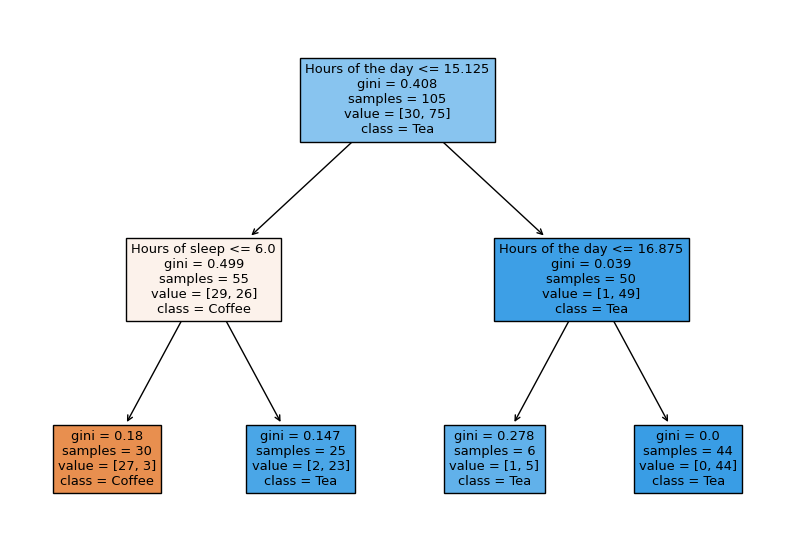

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create and fit the DecisionTreeClassifier
classifier = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2)
classifier.fit(X_train, Y_train)

# Plot the decision tree
fig = plt.figure(figsize=(10, 7))
_ = tree.plot_tree(classifier,
                   feature_names=col_names[:-1],
                   class_names=cols,
                   filled=True)

plt.show()

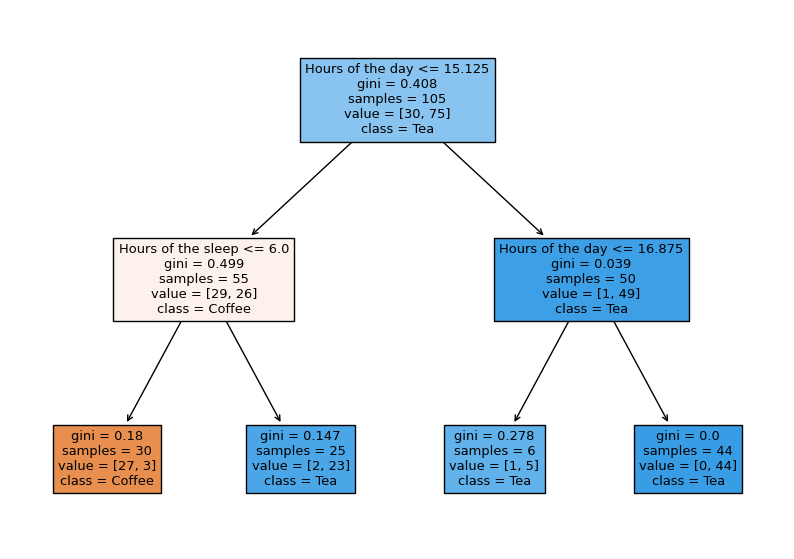

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(classifier,
                   feature_names=cols1,
                   class_names=cols,
                   filled=True)